# Summary Stats on Imagenette

[Imagenette](https://github.com/fastai/imagenette) is a smaller dataset of imagenet that contains 10 easily differentiable classes:   
* tench (n01440764)
* English springer (n02102040)
* cassette player (n02979186)
* chain saw (n03000684)
* church (n03028079)
* French horn (n03394916)
* garbage truck (n03417042)
* gas pump (n03425413)
* golf ball (n03445777)
* parachute (n03888257)

Imagenet Class Idx to human readable names in [json](https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json) 

In [1]:
from fastai.datasets import untar_data, URLs
import pandas as pd
import PIL
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
sns.set(style="white", color_codes=True)

# Import the Data

In [2]:
path = untar_data(URLs.IMAGENETTE, dest='data'); path

PosixPath('data/imagenette')

In [3]:
!tree -d {path}

data/imagenette
├── train
│   ├── n01440764
│   ├── n02102040
│   ├── n02979186
│   ├── n03000684
│   ├── n03028079
│   ├── n03394916
│   ├── n03417042
│   ├── n03425413
│   ├── n03445777
│   └── n03888257
└── val
    ├── n01440764
    ├── n02102040
    ├── n02979186
    ├── n03000684
    ├── n03028079
    ├── n03394916
    ├── n03417042
    ├── n03425413
    ├── n03445777
    └── n03888257

22 directories


# Number of samples per class

In [4]:
def images_per_class(dir_pn):
    '''
        count the number of samples in each class
        expect folder format of 
        dir_pn
        |-- class1
        |    |-- 123.jpg
        |    |-- n39.jpg
        |-- class3
        |    |-- 847.jpg
        |    |-- 3jd.jpb
    '''
    dir_pn = Path(dir_pn)
    cls_folders = [fn.name for fn in dir_pn.glob("*")]
    samples = [len(list((dir_pn/folder).glob("*"))) for folder in cls_folders]
    return cls_folders, samples

In [5]:
train = images_per_class(path/'train')
val = images_per_class(path/'val')

In [6]:
pd.DataFrame({'class': train[0], 'train_count': train[1], 'val_count': val[1]})

,class,train_count,val_count
0,n03028079,1300,50
1,n03394916,1300,50
2,n03445777,1300,50
3,n03425413,1300,50
4,n02979186,1300,50
5,n03000684,1194,50
6,n01440764,1300,50
7,n03888257,1300,50
8,n02102040,1300,50
9,n03417042,1300,50


The dataset is balanced except for **n03000684** which has **1,194** for train. 

# Distribution of image size based on class

In [7]:
cls_folder = [*(path/'train').glob("*")]

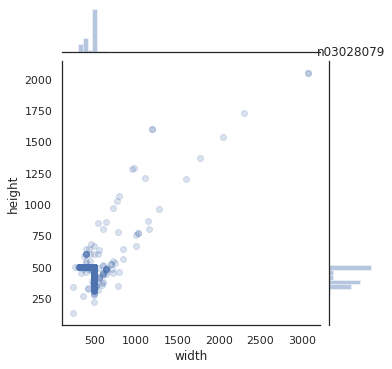

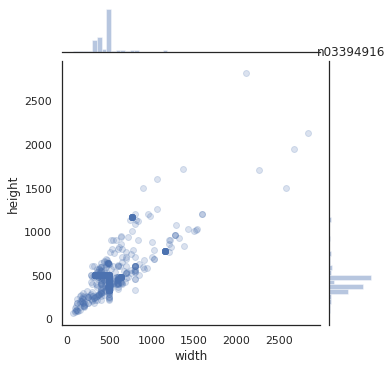

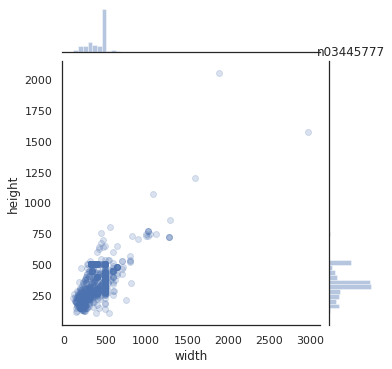

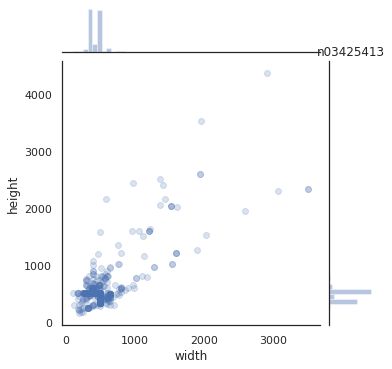

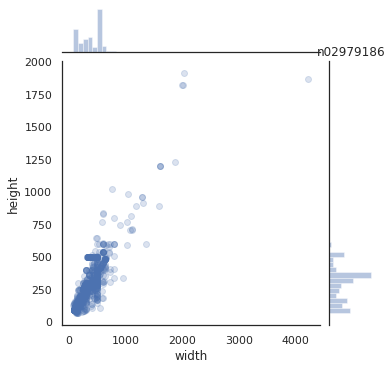

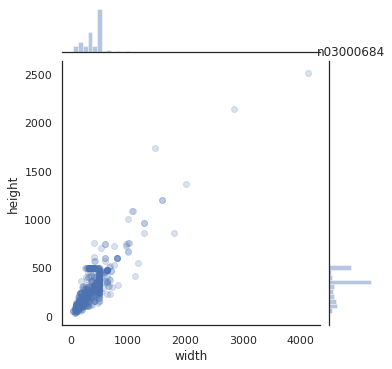

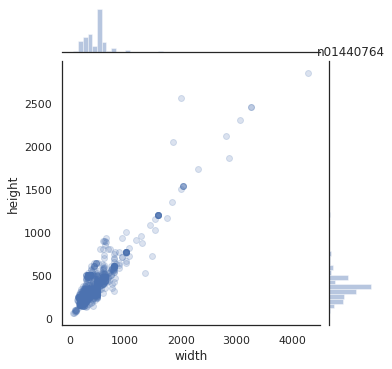

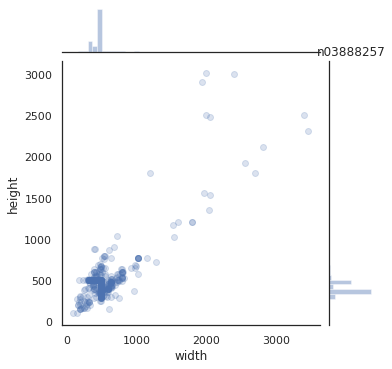

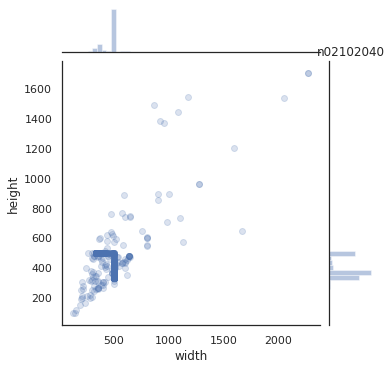

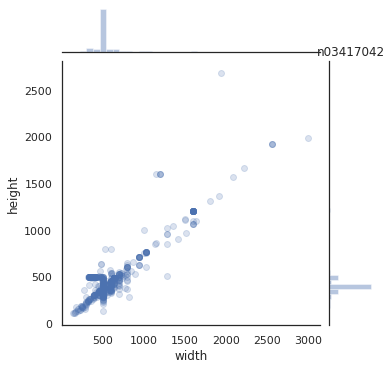

In [8]:
for fd in cls_folder:
    width_ls = []
    height_ls = []
    image_ls = list(fd.glob("*")) 
    for img in image_ls:
        w, h = PIL.Image.open(img).size
        width_ls.append(w)
        height_ls.append(h)
    sns.jointplot(x=width_ls, y=height_ls, alpha=0.2, height=5).set_axis_labels(xlabel='width', ylabel='height')
    plt.title(fd.name);

There isn't an obvious distribution of image size by their class but **n02102040** looks the most different from the rest. 